# Lab 7: Unsupervised Learning
## *Learning from unlabelled data*



### Based on Neil D. Lawrence MLAI2015 version and notebooks by "Aymeric Damien" and from scikit-learn and tensorflow
### Modified by Haiping Lu on 2 November 2018


So far in our classes we have focussed mainly on regression problems, which are examples of supervised learning. We have considered the relationship between the likelihood and the objective function and we have shown how we can find paramters by maximizing the likelihood (equivalent to minimizing the objective function) and in the last session we saw how we can *marginalize* the parameters in a process known as Bayesian inference.

Now we are going to turn to a different form of learning, commonly known as *unsupervised* learning. In unsupervised learning our data isn't necessarily labelled in any form, but we want models that give us a better understanding of the data. We've actually seen an example of this already with [*matrix factorization* for collaborative filtering](./week2.ipynb),  which we introduces in the context of *objective functions*. Now we will introduce a more probabilistic approach to such models, specifically we are interested in *latent variable* modelling.

## Latent Variables (<span style="color:red">*optional*</span>)

Latent means hidden, and hidden variables are simply *unobservable* variables. The idea of a latent variable is crucial to the concept of artificial intelligence, machine learning and experimental design. A latent variable could take many forms. We might observe a man walking along a road with a large bag of clothes and we might *infer* that the man is walking to the laundrette. Our observations are a highly complex data space, the response in our eyes is processed through our visual cortex, the combination of the indidivuals limb movememnts and the direction they are walking in all conflate in our heads to cause us to infer that (perhaps) the individual is going to the laundrette. We don't *know* that the man is walking to the laundrette, but we have a model of the world that suggests that it's a likely outcome for the very complex data. In some ways the latent variable can be seen as a *compression* of this very complex scene. If I were writing a book, I might write that "A man tripped over whilst walking to the laundrette". In the reader's mind an image of a man, perhaps laden with dirty clothes, may occur. All these ideas come from our expectations of the world around us. We can make further inference about the man, some of it perhaps plausible others less so. The man may be going to the laundrette because his washing machine is broken, or because he doesn't have a large enough flat to have a washing machine, or because he's carrying a duvet, or because he doesn't like ironing. All of these may *increase* in probability given our observation, but they are still *latent* variables. Unless we follow the man back to his appartment, or start making other enquirires about the man, we don't know the true answer. 

It's clear that to do inference about any complex system we *must* include latent variables. Latent variables are extremely powerful. In robotics, they are used to represent the *state* of the robot. The state of the robot may include its position (in x, y coordinates) its speed, its direction of facing. How are *these* variables unknown to the robot? Well the robot only posesses *sensors*, it can make observations of the nearest object in a certain direction, and it may have a map of its environment. If we represent the state of the robot as its position on a map, it may be uncertain of that position. If you go walking or running in the hills around Sheffield, you can take a very high quality ordnance survey map with you. However, unless you are a really excellent orienteer, when you are far from any given landmark, you will probably be *uncertain* about your true position on the map. These states are also latent variables. 

In statistical analysis of experiments you try to control for each aspect of the experiment, in particular by *randomization*. So if I'm interested in the ability of a particular fertilizer to improve the yield of a particular plant I may design an experiment where I apply the fertilizer to some plants (the treatment group) and withold the fertilizer from others (the control group). I then test to see whether the yield from the treatment group is better (or worse) than the control group. I may find that I have an excellent yield for the treatment group. However, what if I'd (unknowlingly) planted all my treatment plants in a sunny part of the field, and all the control plants in a shady part of the field. That would also be a latent variable, in this case known as a *confounder*. In statistical experimental design *randomization* is used to attempt to eliminate the correlated effects of these confounders: you aim to ensure that if these confounders *do* exist their effects are not correlated with treatment and contorl. This is known as a [randomized control trial](http://en.wikipedia.org/wiki/Randomized_controlled_trial). 

Greek philosophers worried a great deal about what was knowable and what was unknowable. Adherents of [philosophical Skeptisism](http://en.wikipedia.org/wiki/Skepticism) were inspired by the idea that since your senses sometimes give you contradictory information, they cannot be trusted, and in extreme cases they chose to *ignore* their senses. This is an acknowledgement that very often the true state of the world cannot be known with precision. Unfortunately, these philosophers didn't have a good understanding of probability, so they were unable to encapsulate their ideas through a *degree* of belief.

We often use language to express the compression of a complex behavior or patterns in a simpler way, for example we talk about motives as a useful distallation for a perhaps very complex patter of behavior. In physics we use principles of causation and simple laws to describe the world around us. Such motives or underlying principles are difficult to observe directly, our conclusions about them emerge over a period of time by observing indirect consequences of the latent variables.

Epistemic uncertainty allows us to deal with these worries by associating our degree of belief about the state of the world with a probaiblity distribution. This core idea underpins state space modelling, probabilistic graphical models and the wider field of latent variable modelling. In this session we are going to explore the idea in a simple linear system and see how it relates to *factor analysis* and *principal component analysis*.

## Your Personality (<span style="color:red">*optional*</span>)

At the beginning of the 20th century there was a great deal of interest amoungst psychologists in formalizing patterns of thought. The approach they used became known as factor analysis. The principle is that we observe a potentially high dimensional vector of characteristics about an individual. To formalize this, social scientists designed questionaires. We can envisage many questions that we may ask, but the assumption is that underlying these questions there are only a few traits that dictate the behavior. These models are known as latent trait models and the analysis is sometimes known as factor analysis. The idea is that there are a few characteristic traits that we are looking to discern. These traits or factors can be extracted by assimilating the high dimensional characteristics of the individual into a few latent factors. This causes us to consider a model as follows. 

## Factor Analysis

### Factor Analysis Model

If we are given a high dimensional vector of features (perhaps questionaire answers) associated with an individual, $\mathbf{y}$, we assume that these factors are actually generated from a low dimensional vector latent traits, or latent variables, which determine the personality.
$$
\mathbf{y} = \mathbf{f}(\mathbf{x}) + \boldsymbol{\epsilon}
$$
where $\mathbf{f}(\mathbf{x})$ is a *vector valued* function that is dependent on the latent traits and $\boldsymbol{\epsilon}$ is some corrupting noise. For simplicity, we assume that the function is given by a *linear* relationship,
$$
\mathbf{f}(\mathbf{x}) = \mathbf{W}\mathbf{x}
$$
where we have introduced a matrix $\mathbf{W}$ that is sometimes referred to as the *factor loadings* but we also immediately see is related to our *multivariate linear regression* models from the [previous session on linear regression](./week3.ipynb). That is because our vector valued function is of the form
$$
\mathbf{f}(\mathbf{x}) = \begin{bmatrix} f_1(\mathbf{x}) \\ f_2(\mathbf{x}) \\ \vdots \\ f_p(\mathbf{x})\end{bmatrix}
$$
where there are $p$ features associated with the individual. If we consider any of these functions individually we have a prediction function that looks like a regression model,
$$
f_j(\mathbf{x}) = \mathbf{w}_{j, :}^\top \mathbf{x},
$$
for each element of the vector valued function, where $\mathbf{w}_{:, j}$ is the $j$th column of the matrix $\mathbf{W}$. In that context each column of $\mathbf{W}$ is a vector of *regression weights*. This is a multiple input and multiple output regression. Our inputs (or covariates) have dimensionality greater than 1 and our outputs (or response variables) also have dimensionality greater than one. Just as in a standard regression, we are assuming that we don't observe the function directly (note that this *also* makes the function a *type* of latent variable), but we observe some corrupted variant of the function, where the corruption is given by $\boldsymbol{\epsilon}$. Just as in linear regression we can assume that this corruption is given by Gaussian noise, where the noise for the $j$th element of $\mathbf{y}$ is by,
$$
\epsilon_j \sim \mathcal{N}(0, \sigma^2_j).
$$
Of course, just as in a regression problem we also need to make an assumption across the individual data points to form our full likelihood. Our data set now consists of many observations of $\mathbf{y}$ for diffetent individuals. We store these observations in a *design matrix*, $\mathbf{Y}$, where each *row* of $\mathbf{Y}$ contains the observation for one individual. To emphasize that $\mathbf{y}$ is a vector derived from a row of $\mathbf{Y}$ we represent the observation of the features associated with the $i$th individual by $\mathbf{y}_{i, :}$, and place each individual in our data matrix,
$$
\mathbf{Y} = \begin{bmatrix} \mathbf{y}_{1, :}^\top \\ \mathbf{y}_{2, :}^\top \\ \vdots \\ \mathbf{y}_{n, :}^\top\end{bmatrix},
$$
where we have $n$ data points. Our data matrix therefore has $n$ rows and $p$ columns. The point to notice here is that each data obsesrvation appears as a row vector in the design matrix (thus the transpose operation inside the brackets). Our prediction functions are now actually a *matrix value* function, 
$$
\mathbf{F} = \mathbf{X}\mathbf{W}^\top,
$$
where for each matrix the data points are in the rows and the data features are in the columns. This implies that if we have $q$ inputs to the function we have $\mathbf{F}\in \Re^{n\times p}$, $\mathbf{W} \in \Re^{p \times q}$ and $\mathbf{X} \in \Re^{n\times q}$.

### Assignment Question 1

Show that, given all the definitions above, if,
$$
\mathbf{F} = \mathbf{X}\mathbf{W}^\top
$$
and the elements of the vector valued function $\mathbf{F}$ are given by 
$$
f_{i, j} = f_j(\mathbf{x}_{i, :}),
$$
where $\mathbf{x}_{i, :}$ is the $i$th row of the latent variables, $\mathbf{X}$, then show that
$$
f_j(\mathbf{x}_{i, :}) = \mathbf{w}_{j, :}^\top \mathbf{x}_{i, :}
$$

*10 marks*

#### Question 1 Answer

Write your answer to the question in this box.

From previous assignment, we can know that 
$$\mathbf{X} = \begin{bmatrix} 
\mathbf{x}_1^\top \\\ 
\mathbf{x}_2^\top \\\ 
\vdots \\\
\mathbf{x}_n^\top
\end{bmatrix} = \begin{bmatrix}
1 & x_1 \\\
1 & x_2 \\\
\vdots & \vdots \\\
1 & x_n 
\end{bmatrix} $$

$$\mathbf{W} = \begin{bmatrix}
c_1 & m_1 \\\
c_2 & m_2 \\\
\vdots & \vdots \\\
c_n & m_n
\end{bmatrix} $$

So we can know that

$$ \mathbf{W}^\top = \begin{bmatrix}
c_1 & c_2 & \dots & c_n \\\
m_1 & m_2 & \dots & m_n 
\end{bmatrix} $$

Therefore, we can figure out $ \mathbf{F} $ as follow

$$ \mathbf{F} = \mathbf{X} \mathbf{W}^\top 
 = \begin{bmatrix}
1 & x_1 \\\
1 & x_2 \\\
\vdots & \vdots \\\
1 & x_n 
\end{bmatrix} \begin{bmatrix}
c_1 & c_2 & \dots & c_n \\\
m_1 & m_2 & \dots & m_n 
\end{bmatrix} = \begin{bmatrix}
c_1+x_1 m_1 & c_2+x_1 m_2 & \dots & c_n+x_1 m_n \\\
c_1+x_2 m_1 & c_2+x_2 m_2 & \dots & c_n+x_2 m_n \\\
\vdots & \vdots & \ddots & \vdots \\
c_1+x_n m_1 & c_2+x_n m_2 & \dots & c_n+x_n m_n\end{bmatrix}
= \begin{bmatrix}
x_1 \mathbf{w}^\top \\\
x_2 \mathbf{w}^\top \\\
\vdots \\\
x_n \mathbf{w}^\top \end{bmatrix}
$$

Therefore, we can get that

$$ 
f_j (\mathbf{x}) = \mathbf{x}\mathbf{w}_{j,:}^\top 
$$

Finally, we can show that

$$
f_j(\mathbf{x}_{i, :}) = \mathbf{w}_{j, :}^\top \mathbf{x}_{i, :}
$$

## Latent Variables

The difference between this model and a multiple output regression is that in the regression case we are provided with the covariates $\mathbf{X}$, here they are *latent variables*. These variables are unknown. 

Just as we have done in the past for unknowns, we now treat them with a probability distribution. In *factor analysis* we assume that the latent variables have a Gaussian density which is independent across both across the latent variables associated with the different data points, and across those associated with different data features, so we have,
$$
x_{i,j} \sim \mathcal{N}(0, 1),
$$
and we can write the density governing the latent variable associated with a single point as,
$$
\mathbf{x}_{i, :} \sim \mathcal{N}(\mathbf{0}, \mathbf{I}).
$$
If we consider the values of the function for the $i$th data point as
$$
\mathbf{f}_{i, :} = \mathbf{f}(\mathbf{x}_{i, :}) = \mathbf{W}\mathbf{x}_{i, :} 
$$
then we can use the rules for multivariate Gaussian relationships to write that
$$
\mathbf{f}_{i, :} \sim \mathcal{N}(\mathbf{0}, \mathbf{W}\mathbf{W}^\top)
$$
which implies that the distribution for $\mathbf{y}_{i, :}$ is given by
$$
\mathbf{y}_{i, :} = \sim \mathcal{N}(\mathbf{0}, \mathbf{W}\mathbf{W}^\top + \boldsymbol{\Sigma})
$$
where $\boldsymbol{\Sigma}$ the covariance of the noise variable, $\epsilon_{i, :}$ which for factor analysis is a diagonal matrix (because we have assumed that the noise was *independent* across the features),
$$
\boldsymbol{\Sigma} = \begin{bmatrix}\sigma^2_{1} & 0 & 0 & 0\\
                                     0 & \sigma^2_{2} & 0 & 0\\
                                     0 & 0 & \ddots & 0\\
                                     0 & 0 & 0 & \sigma^2_p\end{bmatrix}.
$$
For completeness, we could also add in a *mean* for the data vector $\boldsymbol{\mu}$, 
$$
\mathbf{y}_{i, :} = \mathbf{W} \mathbf{x}_{i, :} + \boldsymbol{\mu} + \boldsymbol{\epsilon}_{i, :}
$$
which would give our marginal distribution for $\mathbf{y}_{i, :}$ a mean $\boldsymbol{\mu}$. However, the maximum likelihood solution for $\boldsymbol{\mu}$ turns out to equal the empirical mean of the data,
$$
\hat{\boldsymbol{\mu}} = \frac{1}{n} \sum_{i=1}^n \mathbf{y}_{i, :},
$$
*regardless* of the form of the covariance, $\mathbf{C} = \mathbf{W}\mathbf{W}^\top + \boldsymbol{\Sigma}$. As a result it is very common to simply preprocess the data and ensure it is zero mean. We will follow that convention for this session.

The prior density over latent variables is independent, and the likelihood is independent, that means that the marginal likelihood here is also independent over the data points. 
                                     
Factor analysis was developed mainly in psychology and the social sciences for understanding personality and intelligence. [Charles Spearman](http://en.wikipedia.org/wiki/Charles_Spearman) was concerned with the measurements of "the abilities of man" and is credited with the earliest version of factor analysis.                                    
                                   
## Background on PCA and Factor Analysis (<span style="color:red">*optional*</span>)

In 1933 [Harold Hotelling](http://en.wikipedia.org/wiki/Harold_Hotelling) published on *principal component analysis* the first mention of this approach. Hotelling's inspiration was to provide mathematical foundation for factor analysis methods that were by then widely used within psychology and the social sciences. His model was a factor analysis model, but he considered the noiseless 'limit' of the model. In other words he took $\sigma^2_i \rightarrow 0$ so that he had
$$
\mathbf{y}_{i, :} \sim \lim_{\sigma^2 \rightarrow 0} \mathcal{N}(\mathbf{0}, \mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I}).
$$
The paper had two unfortunate effects. Firstly, the resulting model is no longer valid probablistically, because the covariance of this Gaussian is 'degenerate'. Because $\mathbf{W}\mathbf{W}^\top$ has rank of at most $q$ where $q<p$ (due to the dimensionality reduction) the determinant of the covariance is zero, meaning the inverse doesn't exist so the density,
$$
p(\mathbf{y}_{i, :}|\mathbf{W}) = \lim_{\sigma^2 \rightarrow 0} \frac{1}{(2\pi)^\frac{p}{2} |\mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I}|^{-1}} \exp\left(-\frac{1}{2}\mathbf{y}_{i, :}\left[\mathbf{W}\mathbf{W}^\top+ \sigma^2 \mathbf{I}\right]^{-1}\mathbf{y}_{i, :}\right),
$$
is *not* valid for $q<p$ (where $\mathbf{W}\in \Re^{p\times q}$). This mathematical consequence is a probability density which has no 'support' in large regions of the space for $\mathbf{y}_{i, :}$. There are regions for which the probability of $\mathbf{y}_{i, :}$ is zero. These are any regions that lie off the hyperplane defined by mapping from $\mathbf{x}$ to $\mathbf{y}$ with the matrix $\mathbf{W}$. In factor analysis the noise corruption, $\boldsymbol{\epsilon}$, allows for points to be found away from the hyperplane. In Hotelling's PCA the noise variance is zero, so there is only support for points that fall precisely on the hyperplane. Secondly, Hotelling explicity chose to rename factor analysis as principal component analysis, arguing that the factors social scientist sought were different in nature to the concept of a mathematical factor. This was unfortunate because the factor loadings, $\mathbf{W}$ can also be seen as factors in the mathematical sense because the model Hotelling defined is a Gaussian model with covariance given by $\mathbf{C} = \mathbf{W}\mathbf{W}^\top$ so $\mathbf{W}$ is a *factor* of the covariance in the mathematical sense, as well as a factor loading. 

However, the paper had one great advantage over standard approaches to factor analysis. Despite the fact that the model was a special case that is subsumed by the more general approach of factor analysis it is this special case that leads to a particular algorithm, namely that the factor loadings (or principal components as Hotelling referred to them) are given by an *eigenvalue decomposition* of the empirical covariance matrix.


## Principal Component Analysis via Eigenvalue Decomposition

Eigenvalue problems are widespreads in physics and mathematics, they are often written as a matrix/vector equation but we prefer to write them as a full matrix equation. In an eigenvalue problem you are looking to find a matrix of eigenvectors, $\mathbf{U}$ and a *diagonal* matrix of eigenvalues, $\boldsymbol{\Lambda}$ that satisfy the *matrix* equation
$$
\mathbf{A}\mathbf{U} = \mathbf{U}\boldsymbol{\Lambda}.
$$
where $\mathbf{A}$ is your matrix of interest. This equation is not trivially solvable through matrix inverse because matrix multiplication is not [commutative](http://en.wikipedia.org/wiki/Commutative_property), so premultiplying by $\mathbf{U}^{-1}$ gives
$$
\mathbf{U}^{-1}\mathbf{A}\mathbf{U} = \boldsymbol{\Lambda}, 
$$
where we remember that $\boldsymbol{\Lambda}$ is a *diagonal* matrix, so the eigenvectors can be used to *diagonalise* the matrix. When performing the eigendecomposition on a Gaussian covariances, diagonalisation is very important because it returns the covariance to a form where there is no correlation between points. 

### Positive Definite

We are interested in the case where $\mathbf{A}$ is a covariance matrix, which implies it is *positive definite*. A positive definite matrix is one for which the inner product,
$$
\mathbf{w}^\top \mathbf{C}\mathbf{w}
$$
is positive for *all* values of the vector $\mathbf{w}$ other than the zero vector. One way of creating a positive definite matrix is to assume that the symmetric and positive definite matrix $\mathbf{C}\in \Re^{p\times p}$ is factorised into, $\mathbf{A}in \Re^{p\times p}$, a *full rank* matrix, so that
$$
\mathbf{C} = \mathbf{A}^\top \mathbf{A}.
$$
This ensures that $\mathbf{C}$ must be positive definite because
$$
\mathbf{w}^\top \mathbf{C}\mathbf{w}=\mathbf{w}^\top \mathbf{A}^\top\mathbf{A}\mathbf{w} 
$$
and if we now define a new *vector* $\mathbf{b}$ as
$$
\mathbf{b} = \mathbf{A}\mathbf{w}
$$
we can now rewrite as
$$
\mathbf{w}^\top \mathbf{C}\mathbf{w} = \mathbf{b}^\top\mathbf{b} = \sum_{i} b_i^2
$$
which, since it is a sum of squares, is positive or zero. The constraint that $\mathbf{A}$ must be *full rank* ensures that there is no vector $\mathbf{w}$, other than the zero vector, which causes the vector $\mathbf{b}$ to be all zeros. 



### Assignment Question 2

If $\mathbf{C}=\mathbf{A}^\top \mathbf{A}$ then express $c_{i,j}$, the value of the element at the $i$th row and the $j$th column of $\mathbf{C}$, in terms of the columns of $\mathbf{A}$. Use this to show that (i) the matrix is symmetric and (ii) the matrix has positive elements along its diagonal.

*15 marks*

#### Question 2 Answer

Write your answer to the question in this box.

Firstly, we can assume that 

$$
\mathbf{A} = \mathbf{A}_{n,n}
= \begin{bmatrix}
a_{1,1} & a_{1,2} & \dots & a_{1,n} \\\
a_{2,1} & a_{2,2} & \dots & a_{2,n} \\\
\vdots & \vdots & \ddots & \vdots \\\
a_{n,1} & a_{n,2} & \dots & a_{n,n} \end{bmatrix}
$$

Therefore, we can figure out that

$$
\mathbf{A}^\top = \begin{bmatrix}
a_{1,1} & a_{2,1} & \dots & a_{n,1} \\\
a_{1,2} & a_{2,2} & \dots & a_{n,2} \\\
\vdots & \vdots & \ddots & \vdots \\\
a_{1,n} & a_{2,n} & \dots & a_{n,n} \end{bmatrix}
$$

So we can see that

$$
\mathbf{C} = \mathbf{A}^\top \mathbf{A}
= \begin{bmatrix}
a_{1,1}^2 & a_{2,1}^2 & \dots & a_{n,1}^2 \\\
a_{1,2}^2 & a_{2,2}^2 & \dots & a_{n,2}^2 \\\
\vdots & \vdots & \ddots & \vdots \\\
a_{1,n}^2 & a_{2,n}^2 & \dots & a_{n,n}^2 \end{bmatrix}
$$

Therefore, we can see that $\mathbf{C}$ is a symmetic matrix and every element on its diagonal is a square number. So $\mathbf{C}$ has positive elements along its diagonal.

## Eigenvectors of a Symmetric Matric

Symmetric matrices have *orthonormal* eigenvectors. This means that $\mathbf{U}$ is an [orthogonal matrix](http://en.wikipedia.org/wiki/Orthogonal_matrix), $\mathbf{U}^\top\mathbf{U} = \mathbf{I}$. This implies that $\mathbf{u}_{:, i} ^\top \mathbf{u}_{:, j}$ is equal to 0 if $i\neq j$ and 1 if $i=j$. 

## Relationship to Matrix Factorization (<span style="color:red">*optional*</span>)


PCA (and factor analysis) are very reminiscient of the [*matrix factorization* example](./week2.ipynb) that we used for introducing objective functions. In that system we used slightly different notation, $\mathbf{u}_{i, :}$ for *user* location in our metaphorical library and $\mathbf{v}_{j, :}$ for *item* location in our metaphorical library. To see how these systems are somewhat analagous, now let us think about the user as the robot and the items as the wifi access points. We can plot the relative location of both. This process is known as "SLAM": simultaneous *localisation* and *mapping*. A latent variable model of the type we have developed is one way of performing SLAM. We have an estimate of the *landmarks* in the system (in this case WIFI access points) and we have an estimate of the robot position. These are analagous to the estimate of the user's position and the estimate of the items positions in the library. In the matrix factorisation example users are informing us what items they are 'close' to by expressing their preferences, in the robot localization example the robot is informing us what access point it is close to by measuring signal strength.

From a personal perspective, I find this analogy quite comforting. I think it is very arguable that one of the mechanisms through which we (as humans) may have developed higher reasoning is through the need to navigate around our environment, identifying landmarks and associating them with our search for food. If such a system were to exist, the idea that it could be readily adapted to other domains such as categorising the nature of the different foodstuffs we were able to forage is intriguing. 

From an algorithmic perspective, we also can now realise that matrix factorization and latent variable modelling are effectively the same thing. The only difference is the objective function and our probabilistic (or lack of probabilistic) treatment of the variables. But the prediction functoin for both systems,
$$
f_{i, j} = \mathbf{u}_{i, :}^\top \mathbf{v}_{j, :} 
$$
for matrix factorization or
$$
f_{i, j} = \mathbf{x}_{i, :}^\top \mathbf{w}_{j, :} 
$$
for probabilistic PCA and factor analysis are the same.



## PCA in Practice (<span style="color:red">*optional*</span>)

Principal component analysis is so effective in practice that there has almost developed a mini-industry in renaming the method itself (which is ironic, given its origin). In particular [Latent Semantic Indexing](http://en.wikipedia.org/wiki/Latent_semantic_indexing) in text processing is simply PCA on a particular representation of the term frequencies of the document. There is a particular fad to rename the eigenvectors after the nature of the data you are examining, perhaps initially triggered by [Turk and Pentland's](http://www.face-rec.org/algorithms/PCA/jcn.pdf) paper on eigenfaces, but also with [eigenvoices](https://wiki.inf.ed.ac.uk/twiki/pub/CSTR/ListenSemester1_2007_8/kuhn-junqua-eigenvoice-icslp1998.pdf) and [eigengenes](http://www.biomedcentral.com/1752-0509/1/54). This seems to be an instantiation of a wider, and hopefully subconcious, tendency in academia to attempt to differentiate one idea from the same idea in related fields in order to emphasise the novelty. The unfortunate result is somewhat of a confusing literature for relatively simple model. My recommendations would be as follows. If you have multivariate data, applying some form of principal component would seem to be a very good idea as a first step. Even if you intend to later perform classification or regression on your data, it can give you understanding of the structure of the underlying data and help you to develop your intuitions about the nature of your data. Intelligent plotting and interaction with your data is always a good think, and for high dimensional data that means that you need some way of visualisation, PCA is typically a good starting point.


## PCA for High-dimensional data  (<span style="color:red">*optional*</span>)

For $p$>>$n$, you need to consider how to do the larger eigenvalue probleme efficiently without large demands on computer memory.


When the data is quite high dimensional, solving the eigenvalue problem in the high dimensional space can take some time. At this point we turn to a neat trick, you don't have to solve the full eigenvalue problem in the $p\times p$ covariance, you can choose instead to solve the related eigenvalue problem in the $n \times n$ space, and in this case $n=200$ which is much smaller than $p$.

The original eigenvalue problem has the form
$$
\mathbf{Y}^\top\mathbf{Y} \mathbf{U} = \mathbf{U}\boldsymbol{\Lambda}
$$
But if we premultiply by $\mathbf{Y}$ then we can solve,
$$
\mathbf{Y}\mathbf{Y}^\top\mathbf{Y} \mathbf{U} = \mathbf{Y}\mathbf{U}\boldsymbol{\Lambda}
$$
but it turns out that we can write
$$
\mathbf{U}^\prime = \mathbf{Y} \mathbf{U} \Lambda^{\frac{1}{2}}
$$
where $\mathbf{U}^\prime$ is an orthorormal matrix because
$$
\left.\mathbf{U}^\prime\right.^\top\mathbf{U}^\prime = \Lambda^{-\frac{1}{2}}\mathbf{U}\mathbf{Y}^\top\mathbf{Y} \mathbf{U} \Lambda^{-\frac{1}{2}}
$$
and since $\mathbf{U}$ diagonalises $\mathbf{Y}^\top\mathbf{Y}$, 
$$
\mathbf{U}\mathbf{Y}^\top\mathbf{Y} \mathbf{U} = \Lambda
$$
then 
$$
\left.\mathbf{U}^\prime\right.^\top\mathbf{U}^\prime = \mathbf{I}
$$


## $k$-means  Example with Scikit Learn

* Install via Conda <code>conda install scikit-learn</code>


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

<Figure size 1200x1200 with 4 Axes>

More examples at http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

## PCA  Example with Scikit Learn 

### Faces recognition example using eigenfaces and SVMs


The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

2018-11-23 20:45:12,936 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976012


Automatically created module for IPython interactive environment


2018-11-23 20:45:13,200 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976009
2018-11-23 20:45:13,428 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976006
2018-11-23 20:45:13,755 Downloading LFW data (~200MB): https://ndownloader.figshare.com/files/5976015


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
Extracting the top 150 eigenfaces from 966 faces
done in 0.173s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.009s
Fitting the classifier to the training set
done in 47.450s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Predicting people's names on the test set
done in 0.053s
                   precision    recall  f1-score   support

     Ariel Sharon       0.75      0.46      0.57        13
     Colin Powell       0.80      0.87      0.83        60
  Donald Rumsfeld       0.89      0.63      0.74        27
    George W Bush       0.83      0.98      0.90       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       1.00      0.60      0.75    

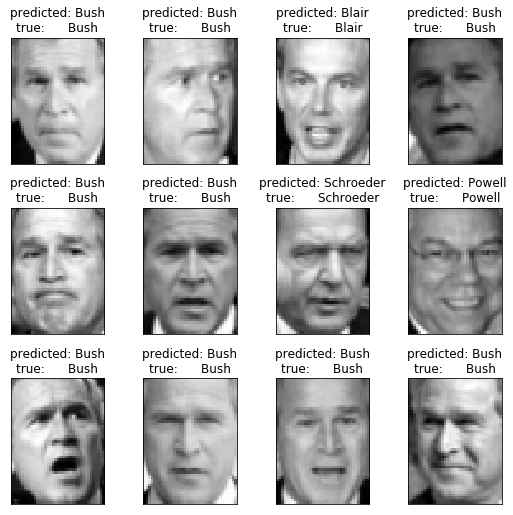

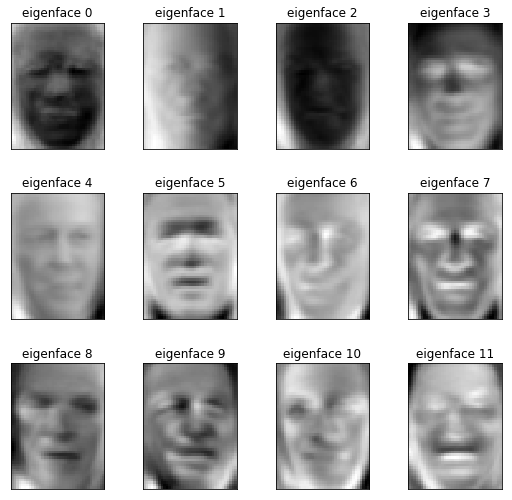

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC


print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


# #############################################################################
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


# #############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

## Auto-Encoder Example with TensorFlow

Build a 2 layers auto-encoder with TensorFlow to compress images to a lower latent space and then reconstruct them.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

### Auto-Encoder Overview

<img src="http://kvfrans.com/content/images/2016/08/autoenc.jpg" alt="ae" style="width: 800px;"/>

References:
- [Gradient-based learning applied to document recognition](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf). Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. Proceedings of the IEEE, 86(11):2278-2324, November 1998.

### MNIST Dataset Overview

This example is using MNIST handwritten digits. The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. For simplicity, each image has been flattened and converted to a 1-D numpy array of 784 features (28*28).

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

More info: http://yann.lecun.com/exdb/mnist/

In [3]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
# Import MNIST data
#Sets the threshold for what messages will be logged.
old_v = tf.logging.get_verbosity()
# able to set the logging verbosity to either DEBUG, INFO, WARN, ERROR, or FATAL. Here its ERROR
tf.logging.set_verbosity(tf.logging.ERROR)
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./data/", one_hot=True)
#in the end
tf.logging.set_verbosity(old_v)

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [7]:
# Training Parameters
learning_rate = 0.01
num_steps = 30000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 128 # 2nd layer num features (the latent dim)
num_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

In [8]:
# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [9]:
# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)

# Training
for i in range(1, num_steps+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    batch_x, _ = mnist.train.next_batch(batch_size)

    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))

Step 1: Minibatch Loss: 0.442319
Step 1000: Minibatch Loss: 0.142915
Step 2000: Minibatch Loss: 0.125881
Step 3000: Minibatch Loss: 0.111613
Step 4000: Minibatch Loss: 0.107996
Step 5000: Minibatch Loss: 0.101817
Step 6000: Minibatch Loss: 0.099371
Step 7000: Minibatch Loss: 0.099386
Step 8000: Minibatch Loss: 0.098808
Step 9000: Minibatch Loss: 0.094610
Step 10000: Minibatch Loss: 0.092499
Step 11000: Minibatch Loss: 0.087657
Step 12000: Minibatch Loss: 0.083524
Step 13000: Minibatch Loss: 0.082555
Step 14000: Minibatch Loss: 0.079262
Step 15000: Minibatch Loss: 0.079404
Step 16000: Minibatch Loss: 0.078129
Step 17000: Minibatch Loss: 0.078035
Step 18000: Minibatch Loss: 0.076590
Step 19000: Minibatch Loss: 0.074043
Step 20000: Minibatch Loss: 0.072510
Step 21000: Minibatch Loss: 0.069917
Step 22000: Minibatch Loss: 0.070397
Step 23000: Minibatch Loss: 0.069862
Step 24000: Minibatch Loss: 0.067051
Step 25000: Minibatch Loss: 0.067964
Step 26000: Minibatch Loss: 0.066040
Step 27000: Mi

Original Images


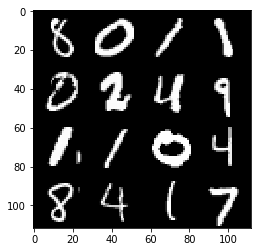

Reconstructed Images


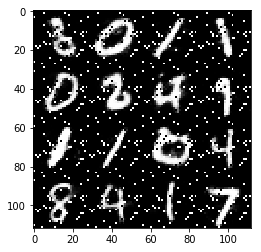

In [11]:
# Testing
# Encode and decode images from test set and visualize their reconstruction.
n = 4
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
    # MNIST test set
    batch_x, _ = mnist.test.next_batch(n)
    # Encode and decode the digit image
    g = sess.run(decoder_op, feed_dict={X: batch_x})
    
    # Display original images
    for j in range(n):
        # Draw the generated digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
    # Display reconstructed images
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()

## PCA on MNIST with TensorFlow

Let's get started, import the TensorFlow library into your program:

In [12]:
import tensorflow as tf

Load and prepare the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset using [Keras](https://keras.io/). Convert the samples from integers to floating-point numbers:

In [13]:
mnist = tf.keras.datasets.mnist

(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
x_train_mnist, x_test_mnist = x_train_mnist / 255.0, x_test_mnist / 255.0

### Assignment Question 3

*Follow the PCA Example with Scikit Learn to complete this question*

* 3a. Apply PCA to the training data from the MNIST dataset above (*x_train_mnist*). Print the top 30 eigenvalues. [*10 marks*]
* 3b. Plot the **cumulative** variances captured by the top 30 PCs (plot 30 values in total, e.g., the cumulative variance for the top 5 PCs is the summation of variance captured by the top 5 PCs). Also print out the results (30 values). [*10 marks*]
* 3c. Visualise the top 10 eigenvectors as images. Describe what you can observe. [*10 marks*]
* 3d. Use the top 10 PCs to reconstruct all the original images as *x_train_mnist_approx*. Compute and print the mean squared error over all images (resulting in a single value). Show any 10 pairs of reconstructed and original images. [*15 marks*]

*Total: 45 marks*

Provide your python code implementation below and show the output obtained. Explain the key steps with comments to make your code more readable. 

top 30 eigenvalues:  [5.11687301 3.74139084 3.25270845 2.8416207  2.56711774 2.27366339
 1.72515498 1.52056024 1.45630525 1.24275009 1.11208951 1.06664054
 0.90468083 0.89218122 0.83235304 0.7819003  0.69838682 0.67325577
 0.62599437 0.60776277 0.56214571 0.53079774 0.50277521 0.48113499
 0.46576058 0.44253363 0.42840671 0.41458312 0.392363   0.36416036]
cumulative variances: [ 5.11687301  8.85826384 12.1109723  14.95259299 17.51971074 19.79337412
 21.51852911 23.03908935 24.4953946  25.73814469 26.8502342  27.91687474
 28.82155557 29.71373679 30.54608983 31.32799013 32.02637694 32.69963271
 33.32562709 33.93338986 34.49553556 35.02633331 35.52910852 36.01024351
 36.47600409 36.91853772 37.34694443 37.76152755 38.15389055 38.51805092]
mean squared error:  0.0344226072872634


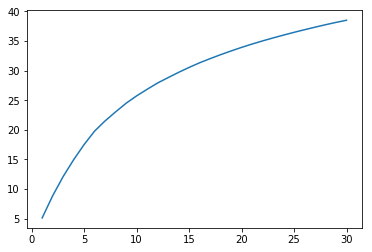

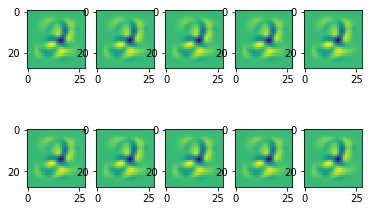

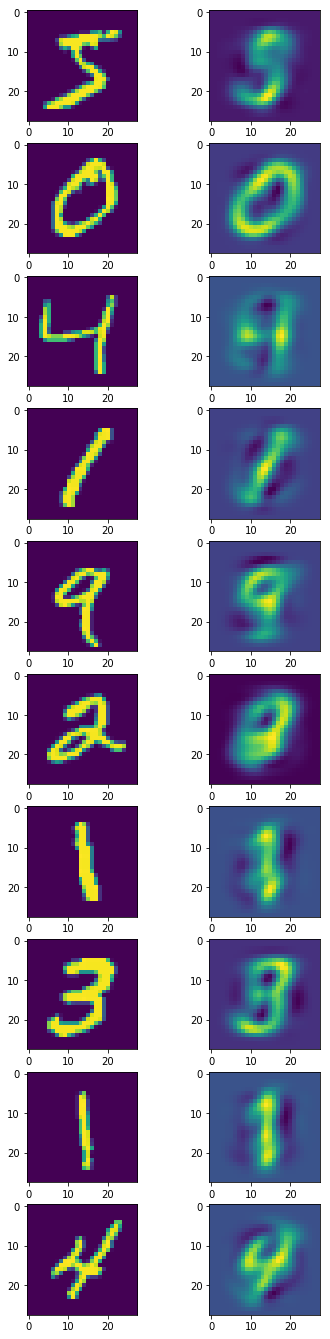

In [21]:
# Note: You need to reshape the data from images to vectors in order to use PCA
# Your code with comments and output

# firstly, we need to shape the data
n_train_shape1 = x_train_mnist.shape[0]
a = x_train_mnist.shape[1] 
b = x_train_mnist.shape[2]
n_eigenvalue = 30
# then, we can shape the data into 2 dimension
x_train_shape2 = x_train_mnist.reshape(n_train_shape1, a*b)

# we can complete questions now
# 3a: print the top 30 eigenvalues
data_PCA = PCA(n_components=n_eigenvalue, svd_solver='randomized', whiten=True).fit(x_train_shape2)
print("top 30 eigenvalues: ", data_PCA.explained_variance_)

# 3b: plot cumulative variances
variance_cum = np.cumsum(data_PCA.explained_variance_)
plt.figure()
plt.plot(x_axis, variance_cum)

print("cumulative variances:", variance_cum)

#3c: visualise the top 10
plt.figure()
for i in range(10):
    images_top10 = data_PCA.components_[i].reshape((a,b))
    plt.subplot(2, 5, i+1)
    plt.imshow(imgages2_top10)
    
# 3d: Compute and print the mean squared error 
data_PCA = PCA(n_components=10, svd_solver='randomized', whiten=True).fit(x_train_shape2)
x_train_tras = data_PCA.transform(x_train_shape2)
reconstructionx = data_PCA.inverse_transform(x_train_tras)

e = (np.subtract(x_train_shape2, reconstructionx)**2).sum() / (n_train_shape1*a*b)
print("mean squared error: ", e)

# plot 10 pairs of original and reconstructed images
plt.figure(figsize=(6,24))
for i in range(10):
   
    plt.subplot(10, 2, 2*i+1)
    
    images_orig = x_train_mnist[i]
    plt.imshow(images_orig)

    plt.subplot(10, 2, 2*i+2)
    images_recons = reconstructionx[i].reshape((a,b))
    plt.imshow(images_recons)
plt.show(33)



### Assignment Question 4

In Assignment Question 3 above, you used images of all the 10 digits. Now choose any two digits (e.g., 1 and 2, or 5 and 6, etc) and do the following.

* 4a. Apply PCA to all training images of the two chosen digits. Visualise the top 10 eigenvectors as images. Describe what you can observe in comparison to those in Question 3. [*10 marks*]
* 4b. Plot the PCA representations of all training data points (for the two chosen digits) in a 2D plane using the top two PCs. Use different colours/markers for the two digits for better visualisation (*Hint: You need to use the labels here for visualisation*).  [*10 marks*] 
* 4c. Use $k$-means to cluster all training data points (of the two chosen digits) as represented by the top 2 PCs (clustering of two-dimensional vectors, where each vector has two values, PC1 and PC2). Visualise the two clusters with different colours/markers and indicate the cluster centers clearly with a marker in a figure similar to question 4b. Describe your observations. [*10 marks*] 

*Total: 30 marks*

Provide your python code implementation below and show the output obtained. Explain the key steps with comments to make your code more readable. 

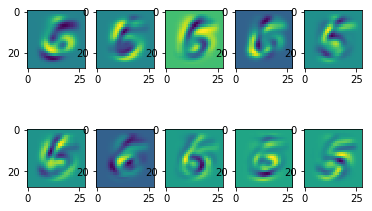

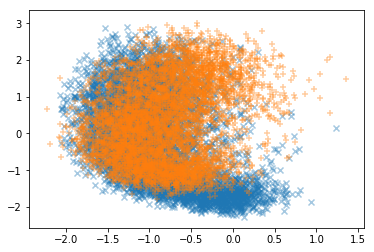

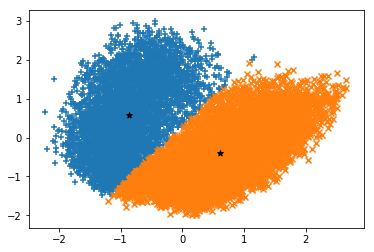

In [37]:
# Your code with comments and output

# 4a: PCA for all training images
mask = (y_train_mnist == 5) | (y_train_mnist == 6)

x2, y2 = x_train_mnist[mask], y_train_mnist[mask]
n2 = x2.shape[0]
c = x2.shape[1]
d = x2.shape[2]
x_reshape2 = x2.reshape((n2, c*d))

data_PCA2 = PCA(n_components=10, svd_solver='randomized', whiten=True).fit(x_reshape2)

plt.figure()
for i in range(10):
    imgages2_top10 = data_PCA2.components_[i].reshape((c, d))
    plt.subplot(2, 5, i+1)
    plt.imshow(imgages2_top10)

# 4b: PCA representations for all training data points
data_PCA3 = PCA(n_components=2, svd_solver='randomized', whiten=True).fit(x_reshape2)
x_trans2 = data_PCA3.transform(x_reshape2)
dig5, dig6 = x_trans2[y2 == 5], x_trans2[y2 == 6]

plt.figure()
plt.scatter(dig2[:, 0], dig2[:, 1], marker='x', label='digit 2', alpha=0.4)
plt.scatter(dig5[:, 0], dig5[:, 1], marker='+', label='digit 5', alpha=0.4)

# 4c: k-means 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(x_trans2)
x0, x1 = x_trans2[kmeans.labels_ == 0], x_trans2[kmeans.labels_ == 1]
plt.figure()
plt.scatter(x0[:, 0], x0[:, 1], label='cluster 0', marker='+')
plt.scatter(x1[:, 0], x1[:, 1], label='cluster 1', marker='x')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], label='center', marker='*', c='k')
plt.show()


## Exercise 5 (For those interested only, not to be marked)

Try different architectures of AutoEncoder to see whether you can get better construction, e.g., the one shown in lecture notebook.

#### Keras
* Keras: a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano.
* Install: <code>conda install -c conda-forge keras</code>
* More on AutoEncoder: Reference: https://blog.keras.io/building-autoencoders-in-keras.html